<a href="https://colab.research.google.com/github/nehmat-kaur/JSC270_A4_Group18/blob/main/JSC270_A4_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from textblob import TextBlob
import re
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:

# Step 1: Load the dataset containing preprocessed text data and corresponding industry labels

# Read the original CSV file
original_df = pd.read_csv('twitter_chatgpt.csv', nrows=30000)
# Keep only the first 30k entries
limited_df = original_df.head(30000)
# Save the limited dataframe to a new CSV file
limited_df.to_csv('twitter_30k.csv', index=False)

tweets = pd.read_csv("twitter_30k.csv")

In [ ]:
# Define the industries and their associated keywords
# industry_keywords = {
#     'Technology': ['technology', 'tech', 'innovation', 'digital', 'software', 'hardware', 'internet', 'programming', 'coding', 'IT', 'gadgets', 'devices', 'cybersecurity', 'artificial intelligence', 'machine learning', 'blockchain', 'robotics', 'automation', 'data science', 'cloud computing'],
#     'Healthcare': ['healthcare', 'health', 'medical', 'medicine', 'doctor', 'nurse', 'hospital', 'patient', 'treatment', 'diagnosis', 'wellness', 'pharmaceutical', 'healthcare industry', 'healthcare services', 'healthcare professionals', 'health education', 'healthcare policy', 'public health', 'healthcare technology'],
#     'Finance': ['finance', 'banking', 'investment', 'wealth management', 'financial services', 'money', 'economy', 'stock market', 'trading', 'business', 'entrepreneurship', 'venture capital', 'fintech', 'insurance', 'financial planning', 'asset management', 'corporate finance', 'financial technology', 'banking industry'],
#     'Education': ['education', 'learning', 'school', 'teacher', 'student', 'classroom', 'curriculum', 'training', 'academic', 'university', 'college', 'e-learning', 'online education', 'educational technology', 'tutoring', 'educational resources', 'educational institutions', 'education policy', 'educational research'],
#     'Retail & E-commerce': ['retail', 'e-commerce', 'shopping', 'online shopping', 'retail industry', 'consumer goods', 'consumer electronics', 'fashion', 'apparel', 'beauty', 'lifestyle', 'retail stores', 'brick-and-mortar', 'online marketplace', 'customer experience', 'sales', 'marketing', 'product launch'],
#     'Hospitality & Tourism': ['hospitality', 'tourism', 'travel', 'hotel', 'accommodation', 'hospitality industry', 'hospitality services', 'hospitality management', 'travel agency', 'destination', 'tourist attraction', 'leisure', 'hospitality technology', 'travel experience', 'tourism marketing', 'travel trends', 'hospitality trends'],
#     'Media & Entertainment': ['media', 'entertainment', 'film', 'television', 'music', 'streaming', 'digital media', 'content creation', 'production', 'broadcasting', 'movie industry', 'TV industry', 'music industry', 'entertainment technology', 'media consumption', 'social media', 'influencer marketing', 'celebrity news']
# }
industry_keywords = {
    'Technology': ['technology', 'tech', 'innovation', 'digital', 'software', 'hardware', 'internet', 'programming', 'coding', 'IT', 'gadgets', 'devices', 'cybersecurity', 'artificial intelligence', 'machine learning', 'blockchain', 'robotics', 'automation', 'data science', 'cloud computing', 'networking', 'web development', 'augmented reality', 'virtual reality', 'big data', 'internet of things', 'computer science', 'software engineering', 'mobile apps'],
    'Healthcare': ['healthcare', 'health', 'medical', 'medicine', 'doctor', 'nurse', 'hospital', 'patient', 'treatment', 'diagnosis', 'wellness', 'pharmaceutical', 'healthcare industry', 'healthcare services', 'healthcare professionals', 'health education', 'healthcare policy', 'public health', 'healthcare technology', 'healthcare innovation', 'medical research', 'healthcare reform', 'telemedicine', 'biotechnology', 'medical devices', 'clinical trials', 'healthcare analytics', 'precision medicine', 'healthcare delivery'],
    'Finance': ['finance', 'banking', 'investment', 'wealth management', 'financial services', 'money', 'economy', 'stock market', 'trading', 'business', 'entrepreneurship', 'venture capital', 'fintech', 'insurance', 'financial planning', 'asset management', 'corporate finance', 'financial technology', 'banking industry', 'financial markets', 'economic indicators', 'financial regulation', 'financial institutions', 'investment banking', 'personal finance', 'capital markets', 'financial literacy', 'credit', 'derivatives'],
    'Education': ['education', 'learning', 'school', 'teacher', 'student', 'classroom', 'curriculum', 'training', 'academic', 'university', 'college', 'e-learning', 'online education', 'educational technology', 'tutoring', 'educational resources', 'educational institutions', 'education policy', 'educational research', 'learning management systems', 'distance learning', 'education reform', 'educational equity', 'educational leadership', 'STEM education', 'early childhood education', 'higher education', 'education technology', 'educational assessment'],
    'Retail & E-commerce': ['retail', 'e-commerce', 'shopping', 'online shopping', 'retail industry', 'consumer goods', 'consumer electronics', 'fashion', 'apparel', 'beauty', 'lifestyle', 'retail stores', 'brick-and-mortar', 'online marketplace', 'customer experience', 'sales', 'marketing', 'product launch', 'retail trends', 'customer engagement', 'retail technology', 'omnichannel', 'retail analytics', 'supply chain', 'logistics', 'customer loyalty', 'retail innovation', 'retail design', 'ecommerce platforms', 'ecommerce trends'],
    'Hospitality & Tourism': ['hospitality', 'tourism', 'travel', 'hotel', 'accommodation', 'hospitality industry', 'hospitality services', 'hospitality management', 'travel agency', 'destination', 'tourist attraction', 'leisure', 'hospitality technology', 'travel experience', 'tourism marketing', 'travel trends', 'hospitality trends', 'hospitality design', 'hospitality jobs', 'destination marketing', 'hotel management', 'hospitality operations', 'tourism industry', 'resort', 'hospitality consulting', 'travel technology', 'hospitality events', 'sustainable tourism', 'luxury travel'],
    'Media & Entertainment': ['media', 'entertainment', 'film', 'television', 'music', 'streaming', 'digital media', 'content creation', 'production', 'broadcasting', 'movie industry', 'TV industry', 'music industry', 'entertainment technology', 'media consumption', 'social media', 'influencer marketing', 'celebrity news', 'entertainment industry', 'content marketing', 'film production', 'TV production', 'media trends', 'entertainment trends', 'streaming services', 'digital content', 'video games', 'celebrity culture', 'pop culture']
}


In [ ]:
if tweets["content"].dtype != "str":
  tweets["content"] = tweets["content"].astype("str")

nltk.download("punkt")

def tokenize(data):
  # create a new column in our DF that contains token lists instead of raw text
  data["tokens"] = data["content"].apply(nltk.word_tokenize)


tokenize(tweets)
# print(tweets["tokens"].head(5))

# tweets.info()

def remove_urls(tokens_df):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'^https?')

    # Function to remove URLs from a single token list
    def clean_token_list(token_list):
        return [token for token in token_list if not re.match(url_pattern, token)]

    # Apply the function to each element in the DataFrame
    cleaned_tokens_df = tokens_df.applymap(lambda x: clean_token_list(x) if isinstance(x, list) else x)

    return cleaned_tokens_df

# Apply the function to the data
test_data = remove_urls(tweets)


# Print the first few rows of the cleaned data
# print(tweets["tokens"].head(5))

# Function to clean the tokens in a dataset
def clean_tokens(tokens_df):
    lowercase_tokens = []
    # create a list of lists with what we want
    for row in tokens_df["tokens"]:
      lowercase_tokens.append([t.lower() for t in row])

    # add the lower case tokens to our df
    tokens_df["lowercase_tokens"] = lowercase_tokens

    tokens_no_punct = []
    for row in tokens_df["lowercase_tokens"]:
      tokens_no_punct.append([re.sub('[^\w\s]','', t) for t in row])
    tokens_df["no_punct_tokens"] = tokens_no_punct

# Apply the function to the data
clean_tokens(tweets)

# Print the first few rows of the cleaned data
# print(tweets["no_punct_tokens"].head(5))

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens in a dataset
def lemmatize_tokens(tokens_df):
    lemmatized_tokens = []

    for row in tokens_df["no_punct_tokens"]:
        lemmatized_tokens.append([lemmatizer.lemmatize(t) for t in row])

    # Add the lemmatized tokens to our dataframe
    tokens_df["lemmatized_tokens"] = lemmatized_tokens

# Apply the function to the data
lemmatize_tokens(tweets)

# print(tweets["lemmatized_tokens"].head(5))

# Removing stopwords with lemmatization

nltk.download('stopwords')
# print the top 75 most popular english words
sw = stopwords.words('english')[:100]

def remove_stopwords(data):
    tokens_no_sw = []
    for row in data['lemmatized_tokens']:
        tokens_no_sw.append([w for w in row if w not in sw])
    # Add column to df
    data['tokens_no_sw'] = tokens_no_sw

remove_stopwords(tweets)

# Print some examples
# print(tweets['lemmatized_tokens'].head(5))
# print(tweets['tokens_no_sw'].head(5))

tweets['tokens_no_sw'] = tweets['tokens_no_sw'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to assign industry based on keywords
def assign_industry(content):
    for industry, keywords in industry_keywords.items():
        # Check if any keyword is present in the content
        for keyword in keywords:
            if keyword in content.lower():
                return industry
    # If no keyword is found, return 'Other'
    return 'Other'

# Assign industry to each tweet
tweets['industry'] = tweets['tokens_no_sw'].apply(assign_industry)

In [ ]:
# Function to calculate final sentiment score
def calculate_final_sentiment(content, like_count, retweet_count):
    # Perform sentiment analysis using TextBlob
    blob = TextBlob(content)
    initial_sentiment_score = blob.sentiment.polarity

    # Normalize like and retweet counts
    max_like_count = max(tweets['like_count'])
    max_retweet_count = max(tweets['retweet_count'])
    normalized_like_count = like_count / max_like_count
    normalized_retweet_count = retweet_count / max_retweet_count

    # Adjust sentiment score based on normalized counts
    sentiment_adjustment = (normalized_like_count + normalized_retweet_count) / 2

    # Combine initial sentiment score and adjustment
    final_sentiment_score = initial_sentiment_score + sentiment_adjustment

    # Ensure final sentiment score falls within range [-1, 1]
    final_sentiment_score = max(min(final_sentiment_score, 1), -1)

    return final_sentiment_score

for index, row in tweets.iterrows():
    content = row['content']
    like_count = row['like_count']
    retweet_count = row['retweet_count']

    # Calculate sentiment score for the tweet
    sentiment_score = calculate_final_sentiment(content, like_count, retweet_count)

    # Assign the sentiment score to the 'sentiment_score' column in the dataframe
    tweets.at[index, 'sentiment_score'] = sentiment_score

In [ ]:
# Save the limited dataframe with assigned industries to a new CSV file
tweets.to_csv('twitter_30k_industries.csv', index=False)
df = pd.read_csv("twitter_30k_industries.csv")

In [ ]:
# Step 2: Feature Extraction
# Extract features from the 'sentiment_score' column and normalize them

scaler = MinMaxScaler()
X = scaler.fit_transform(df[['sentiment_score']])
y = df['industry']

# Step 3: Model Training
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Evaluate the model's performance on the testing data
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_test, average='weighted')  # 'weighted' takes label imbalance into account
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_test, average='weighted')  # 'weighted' takes label imbalance into account
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_test, average='weighted')  # 'weighted' takes label imbalance into account
print("F1-score:", f1)

Train Accuracy: 0.7128333333333333
Test Accuracy: 0.7103333333333334
Precision: 0.5045734444444445
Recall: 0.7103333333333334
F1-score: 0.5900293639966219


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Initialize an empty dataframe to store predictions and actual labels
results_df = pd.DataFrame(columns=['Actual Industry', 'Predicted Industry', 'Sentiment Score'])

# Iterate over the test data
for idx, instance in enumerate(X_test):
    # Predict the industry for the current instance
    predicted_industry = model.predict([instance])[0]
    actual_industry = y_test.iloc[idx]

    # Get the sentiment score corresponding to the current instance
    sentiment_score = X_test[idx][0]

    # Store the predicted and actual industry labels along with sentiment score in the dataframe
    results_df.loc[idx] = [actual_industry, predicted_industry, sentiment_score]

# Map sentiment categories to sentiment scores
sentiment_categories = {
    'Positive': (0.5, 1.0),
    'Neutral': (-0.5, 0.5),
    'Negative': (-1.0, -0.5)
}

# Function to categorize sentiment based on sentiment score
def categorize_sentiment(sentiment_score):
    for sentiment, (lower_bound, upper_bound) in sentiment_categories.items():
        if lower_bound <= sentiment_score <= upper_bound:
            return sentiment

# Add a column to the dataframe for predicted sentiment based on sentiment score
results_df['Predicted Sentiment'] = results_df.apply(lambda row: categorize_sentiment(row['Sentiment Score']), axis=1)

# Print the dataframe
print("Predictions and Actual Labels:")
print(results_df)

# Print sentiment associated with each industry
print("\nSentiment Associated with Each Industry:")
for industry, sentiment_score in results_df.groupby('Actual Industry')['Sentiment Score']:
    mean_sentiment_score = sentiment_score.mean()
    print(f"Industry: {industry}, Mean Sentiment Score: {mean_sentiment_score}, Sentiment: {categorize_sentiment(mean_sentiment_score)}")


Predictions and Actual Labels:
     Actual Industry Predicted Industry  Sentiment Score Predicted Sentiment
0              Other              Other         0.500000            Positive
1              Other              Other         0.600027            Positive
2              Other              Other         0.615000            Positive
3         Technology              Other         0.508360            Positive
4              Other              Other         0.400000             Neutral
...              ...                ...              ...                 ...
5995      Technology              Other         0.400000             Neutral
5996           Other              Other         0.550000            Positive
5997           Other              Other         0.560009            Positive
5998      Technology              Other         0.633946            Positive
5999           Other              Other         0.500000            Positive

[6000 rows x 4 columns]

Sentiment Associate

industry
Other                    21370
Technology                5288
Education                 1196
Finance                   1013
Media & Entertainment      394
Retail & E-commerce        348
Healthcare                 319
Hospitality & Tourism       72
Name: count, dtype: int64


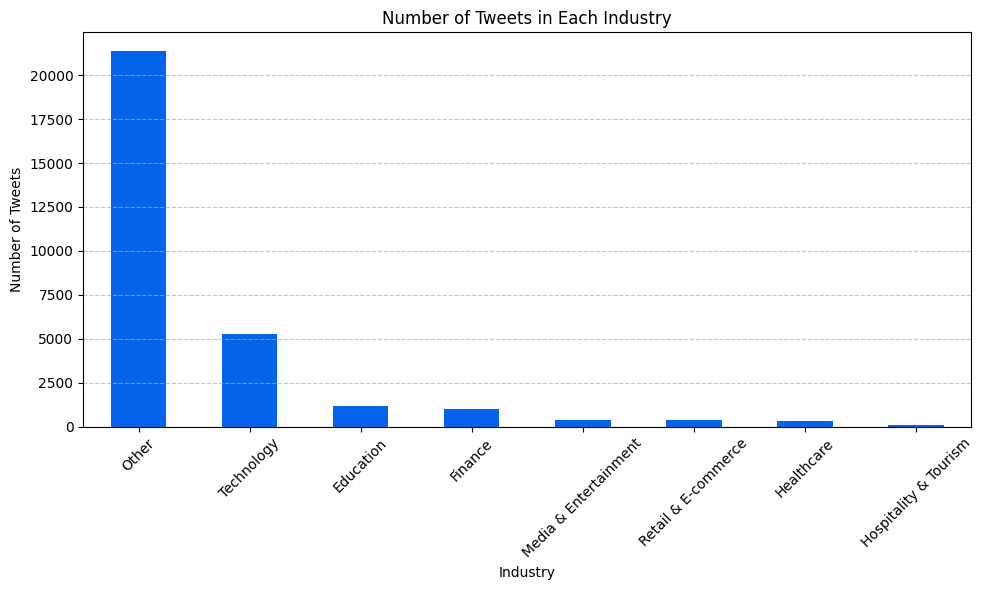

In [ ]:
industry_counts = df['industry'].value_counts()
print(industry_counts)
# Plot the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
industry_counts.plot(kind='bar', color='#0363eb')
plt.title('Number of Tweets in Each Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

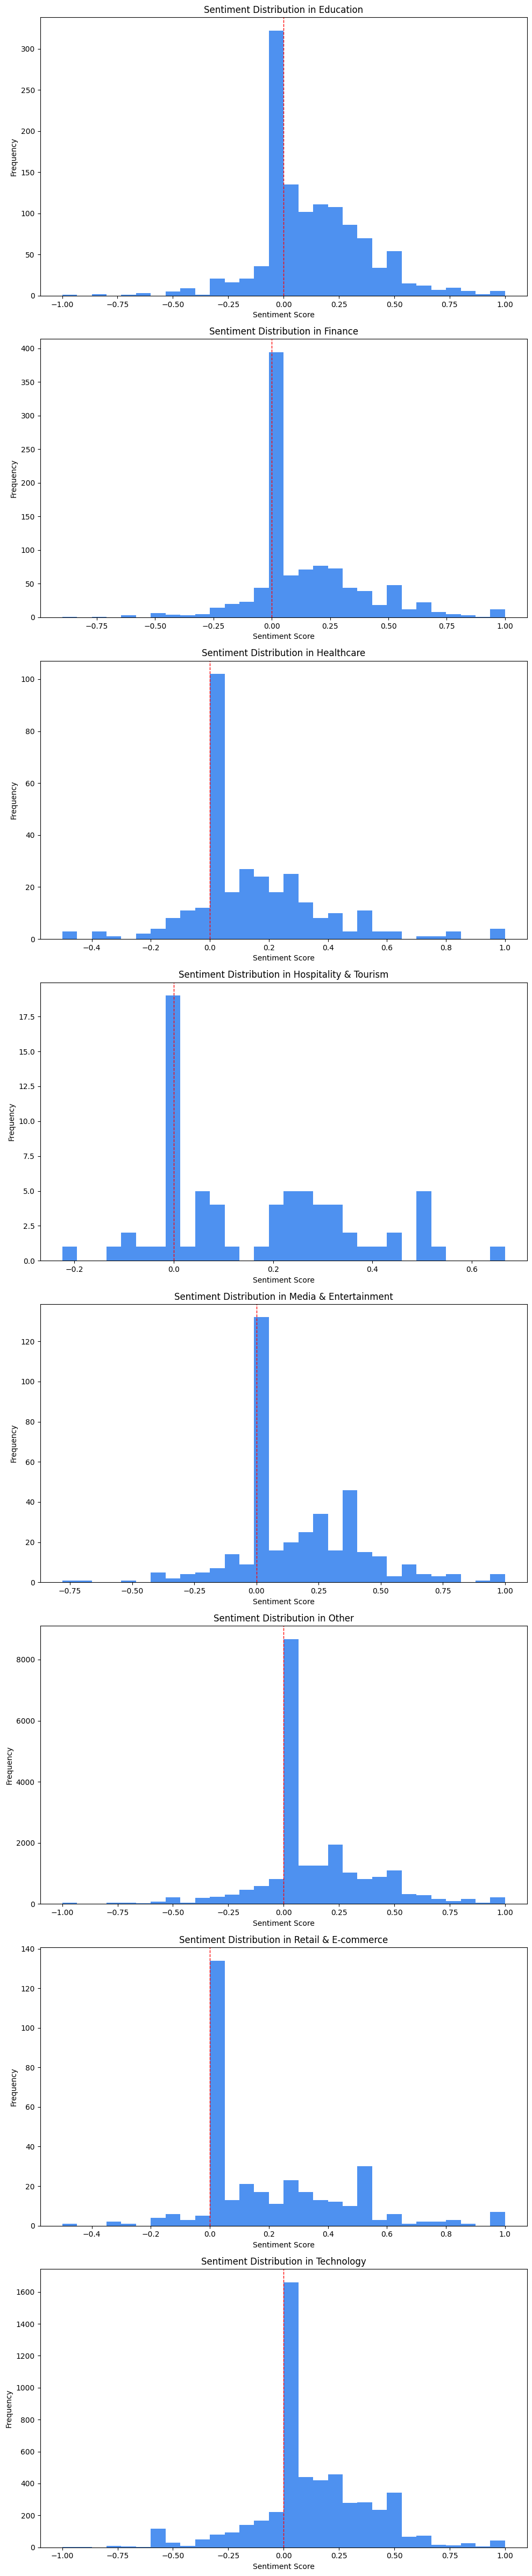

In [ ]:
num_industries = len(df['industry'].unique())
fig, axs = plt.subplots(num_industries, figsize=(10, 6*num_industries))

# Iterate through each industry
for i, (industry, group) in enumerate(df.groupby('industry')):
    # Plot histogram of sentiment scores for the current industry
    axs[i].hist(group['sentiment_score'], bins=30, color='#0363eb', alpha=0.7)
    axs[i].axvline(x=0, color='red', linestyle='--', linewidth=1)
    axs[i].set_title(f'Sentiment Distribution in {industry}')
    axs[i].set_xlabel('Sentiment Score')
    axs[i].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

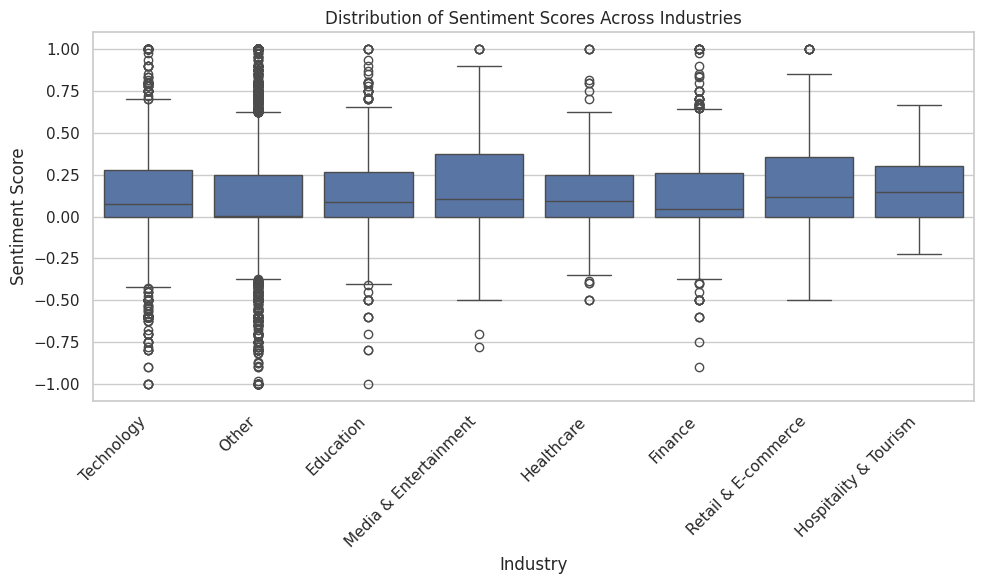

In [ ]:

# Set seaborn style
sns.set(style="whitegrid")

# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='industry', y='sentiment_score')
plt.title('Distribution of Sentiment Scores Across Industries')
plt.xlabel('Industry')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
# # Convert TF-IDF vectors back to text content
# X_test_text = vectorizer.inverse_transform(X_test)

# # Create a DataFrame to store the predictions and actual labels
# results_df = pd.DataFrame({'Content': [' '.join(tokens) for tokens in X_test_text],
#                            'Predicted Industry': y_pred,
#                            'True Industry': y_test})

# # Add a column to indicate whether the prediction was correct
# results_df['Prediction Correct'] = results_df['Predicted Industry'] == results_df['True Industry']

# # # Display the DataFrame
# # print(results_df)